In [20]:
import pandas as pd
from pathlib import Path as PPath

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import ast

In [23]:
import re

In [24]:
PATH = './experiments/'

In [25]:
#%matplotlib inline

In [26]:
%matplotlib notebook

# Functions

In [19]:
test_str  = '[704.7250945293949, 0, 0.0, 0.0, 30, 5.522710477581892]'
function(test_str)

'verify'

In [27]:
def function(x):
    x = ast.literal_eval(x)
    
    if x[1] > 0: # Hit obstacle (fit_obs) (max 1 hit)
        return 'infeasible'
    
    elif x[0] > 2: # Away from destination wp (fit_d) (max 2 meters)
        return 'verify'
    
    else:
        return 'feasible'

In [ ]:
pathlist = PPath(PATH).glob("**/mode_A*_exec_1_*.csv")

for i, p in enumerate(pathlist):
    print(p)
    
print('Qty: ', i+1)

In [31]:
pathlist = PPath(PATH).glob("**/mode_DEC*_exec_1_*.csv")

quantity_feasibility = []

for path in pathlist:
    df = pd.read_csv(path)
    
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    quantity_feasibility.append({
        'qty_infeasible': df.loc[df['label']=='infeasible'].shape[0],
        'qty_verify': df.loc[df['label']=='verify'].shape[0],
        'qty_feasible': df.loc[df['label']=='feasible'].shape[0],
        'best': df[df.fitness == df.fitness.min()].iloc[0]['label']
    })


<IPython.core.display.Javascript object>


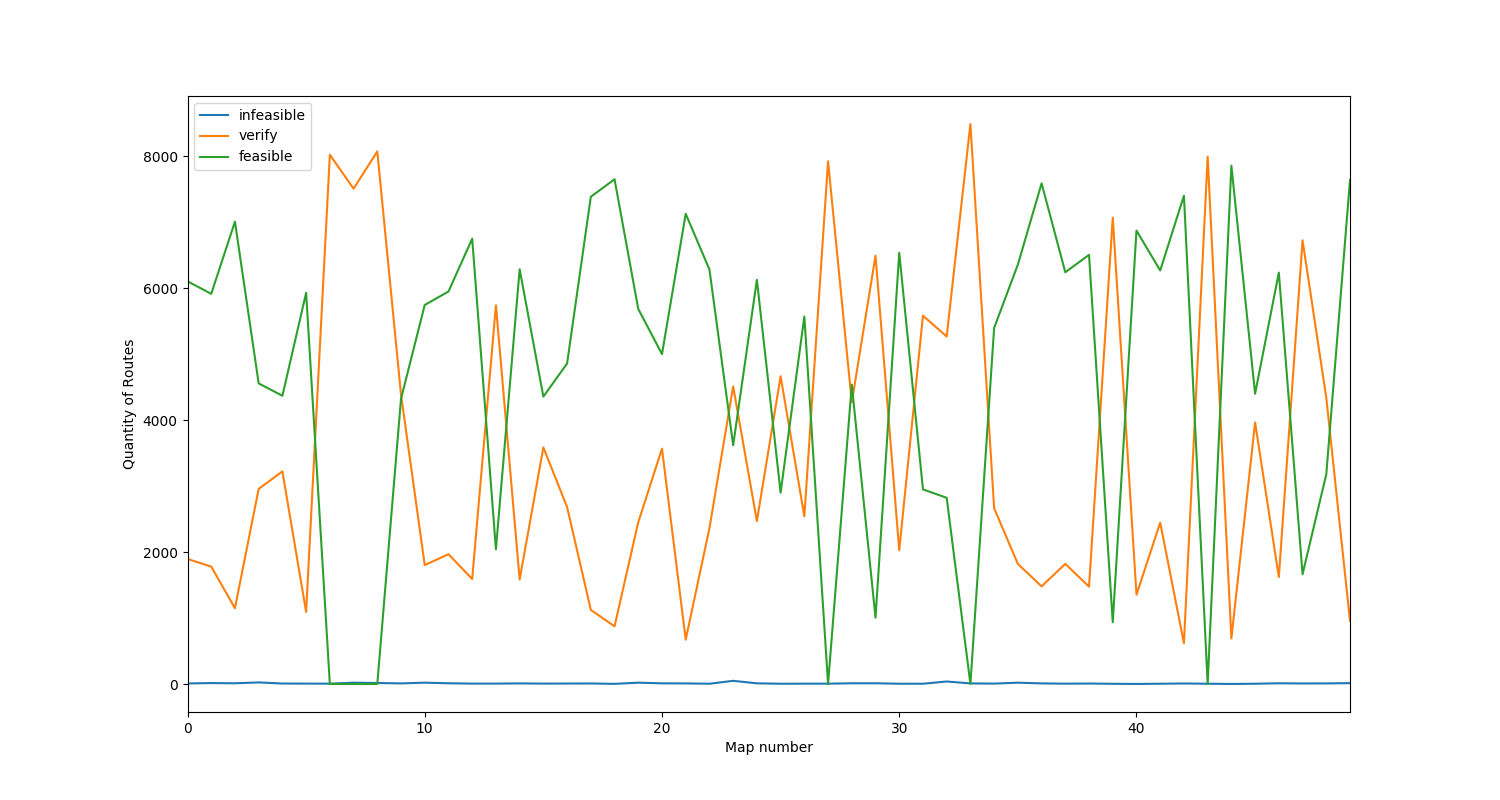

[]

In [32]:
quantity_feasibility_df = pd.DataFrame(quantity_feasibility)
ax = quantity_feasibility_df.plot(figsize=(15,8))
ax.legend(['infeasible', 'verify', 'feasible'])
ax.set_xlabel('Map number')
ax.set_ylabel('Quantity of Routes')
ax.plot()
# mode__exec_1_category_routes

<IPython.core.display.Javascript object>


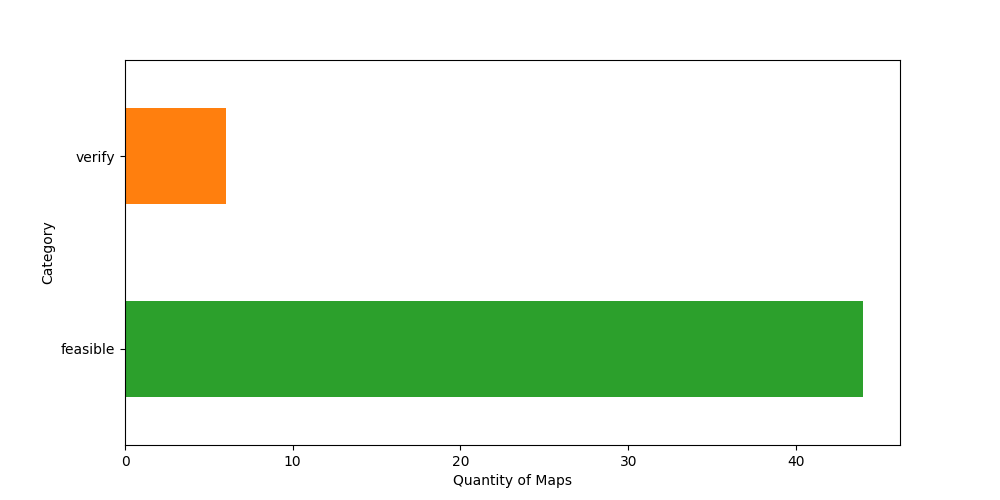

Text(0, 0.5, 'Category')

In [33]:
plt.figure()
# color=['C2','C0','C1']
ax = quantity_feasibility_df['best'].value_counts().plot.barh(figsize=(10,5), color=['C2','C1','C0'])
ax.set_xlabel('Quantity of Maps')
ax.set_ylabel('Category')
# # mode__exec_1_category_maps

In [12]:
quantity_feasibility_df

,qty_infeasible,qty_verify,qty_feasible,best
0,4,6,0,verify
1,5,5,0,verify
2,3,7,0,verify
3,3,7,0,verify
4,2,8,0,verify
5,7,3,0,verify
6,3,7,0,verify
7,3,7,0,verify
8,4,6,0,verify
9,3,7,0,verify


# Experiments

In [ ]:
# pathlist = PPath(MAPS_PATH).glob("**/*.sgl")

In [ ]:
df = pd.read_csv(PATH + 'mode_R-PC_map_06_exec_1_history.csv')
df.sample(20)

In [ ]:
%matplotlib notebook
plt.plot(df['birth_time'], df['fitness'])

In [ ]:
def plot(df):
    fig = go.Figure()
    for column in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df[column], name=column))
    fig.show()

In [ ]:
df_1 = df.groupby(['generation']).agg({'fitness': [np.min, np.mean]})
df_1.columns = df_1.columns.get_level_values(1)
plot(df_1)

In [ ]:
df_1

In [ ]:
# Gerar df de bests

ancestry = []

melhor = df.iloc[0]['fitness']
for i in range(df.shape[0]):
    if df.iloc[i]['fitness'] < melhor:
        melhor = df.iloc[i]['fitness']
        ancestry.append([df.iloc[i]['birth_time'], df.iloc[i]['generation'], melhor])

In [ ]:
df_ancestry = pd.DataFrame(ancestry, columns=['birth_time', 'generation', 'fitness'])

In [ ]:
df_ancestry

In [ ]:
plot(df_ancestry)

In [ ]:
plt.plot(df_ancestry['generation'], df_ancestry['fitness'])
plt.plot(df_1['mean'])

In [ ]:
df['fitness_trace'][0]

In [ ]:
ast.literal_eval(df['fitness_trace'])

In [ ]:
def function(x):
    x = ast.literal_eval(x)
    
    if x[1] > 4000:
        return 'infeasible'
    
    elif x[0] > 500:
        return 'verify'
    
    else:
        return 'feasible'

In [ ]:
df['label'] = df['fitness_trace'].apply(lambda x: function(x))

In [ ]:
{
    'qty_infeasible': df.loc[df['label']=='infeasible'].shape[0],
    'qty_verify': df.loc[df['label']=='verify'].shape[0],
    'qty_feasible': df.loc[df['label']=='feasible'].shape[0]
}

In [ ]:
df[df.fitness == df.fitness.min()].iloc[0]['label']

# Experiments

<IPython.core.display.Javascript object>


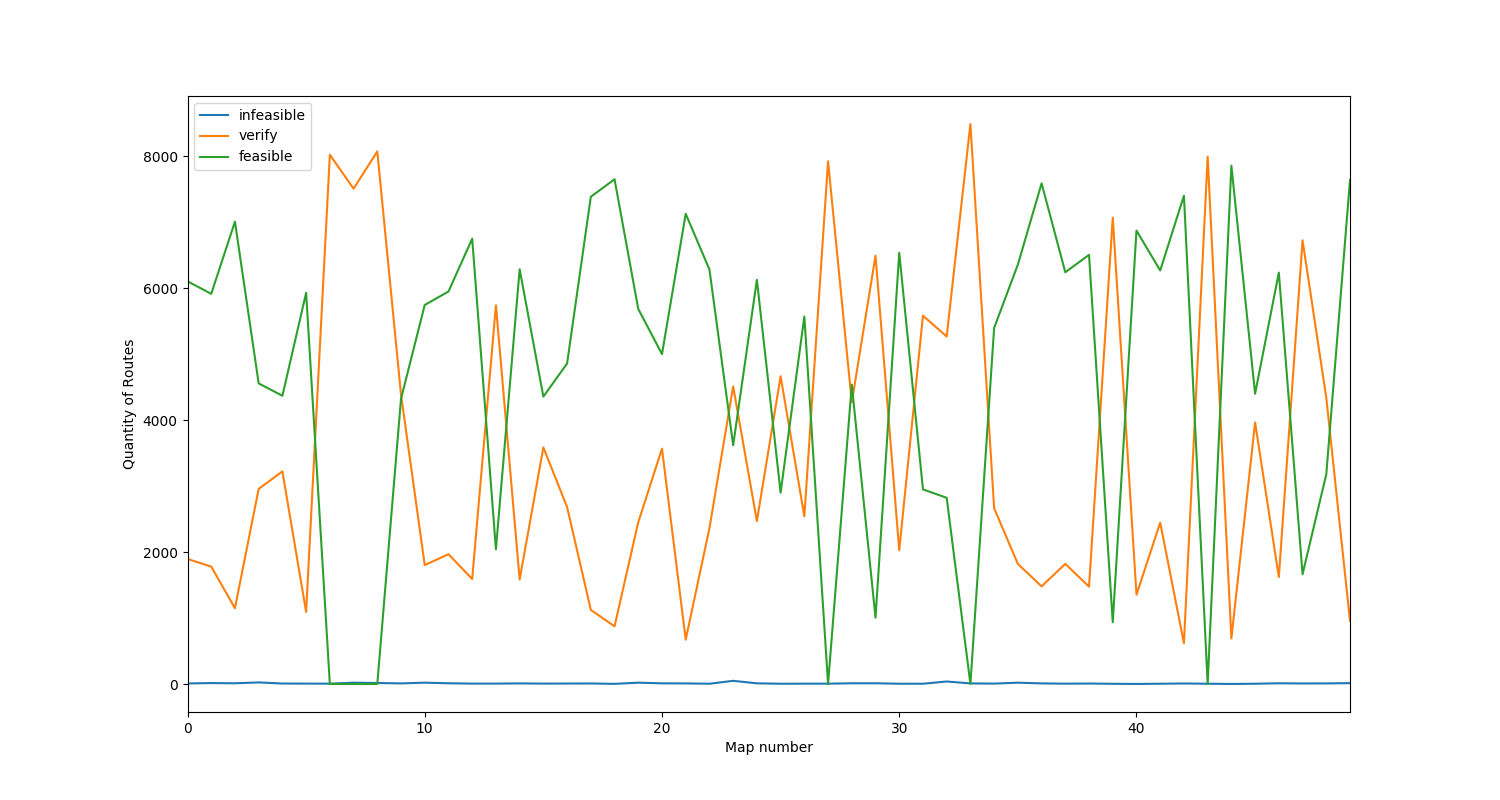

[]

In [34]:
quantity_feasibility_df = pd.DataFrame(quantity_feasibility)
ax = quantity_feasibility_df.plot(figsize=(15,8))
ax.legend(['infeasible', 'verify', 'feasible'])
ax.set_xlabel('Map number')
ax.set_ylabel('Quantity of Routes')
ax.plot()
# mode__exec_1_category_routes

<IPython.core.display.Javascript object>


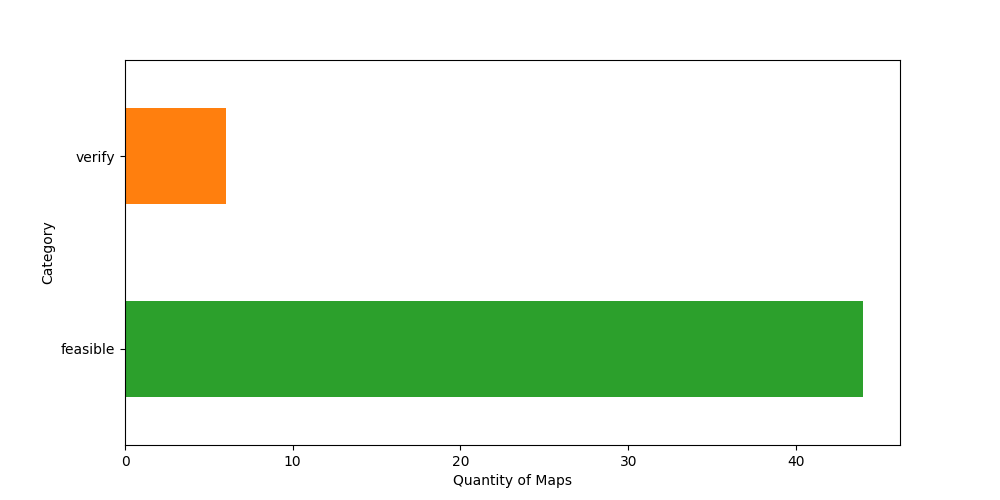

Text(0, 0.5, 'Category')

In [35]:
plt.figure()
# color=['C2','C0','C1']
ax = quantity_feasibility_df['best'].value_counts().plot.barh(figsize=(10,5), color=['C2','C1','C0'])
ax.set_xlabel('Quantity of Maps')
ax.set_ylabel('Category')
# # mode__exec_1_category_maps

In [ ]:
quantity_feasibility_df

# Experiments

In [9]:
# pathlist = PPath(MAPS_PATH).glob("**/*.sgl")

In [10]:
df = pd.read_csv(PATH + 'mode_R-PC_map_06_exec_1_history.csv')
df.sample(20)

FileNotFoundError: [Errno 2] File b'./experiments/mode_R-PC_map_06_exec_1_history.csv' does not exist: b'./experiments/mode_R-PC_map_06_exec_1_history.csv'

In [11]:
%matplotlib notebook
plt.plot(df['birth_time'], df['fitness'])

NameError: name 'df' is not defined

In [ ]:
def plot(df):
    fig = go.Figure()
    for column in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df[column], name=column))
    fig.show()

In [ ]:
df_1 = df.groupby(['generation']).agg({'fitness': [np.min, np.mean]})
df_1.columns = df_1.columns.get_level_values(1)
plot(df_1)

In [ ]:
df_1

In [ ]:
# Gerar df de bests

ancestry = []

melhor = df.iloc[0]['fitness']
for i in range(df.shape[0]):
    if df.iloc[i]['fitness'] < melhor:
        melhor = df.iloc[i]['fitness']
        ancestry.append([df.iloc[i]['birth_time'], df.iloc[i]['generation'], melhor])

In [ ]:
df_ancestry = pd.DataFrame(ancestry, columns=['birth_time', 'generation', 'fitness'])

In [ ]:
df_ancestry

In [ ]:
plot(df_ancestry)

In [ ]:
plt.plot(df_ancestry['generation'], df_ancestry['fitness'])
plt.plot(df_1['mean'])

In [ ]:
df['fitness_trace'][0]

In [ ]:
ast.literal_eval(df['fitness_trace'])

In [ ]:
def function(x):
    x = ast.literal_eval(x)
    
    if x[1] > 4000:
        return 'infeasible'
    
    elif x[0] > 500:
        return 'verify'
    
    else:
        return 'feasible'

In [ ]:
df['label'] = df['fitness_trace'].apply(lambda x: function(x))

In [ ]:
{
    'qty_infeasible': df.loc[df['label']=='infeasible'].shape[0],
    'qty_verify': df.loc[df['label']=='verify'].shape[0],
    'qty_feasible': df.loc[df['label']=='feasible'].shape[0]
}

In [ ]:
df[df.fitness == df.fitness.min()].iloc[0]['label']

# Experiments

In [36]:
pathlist = PPath(PATH).glob("**/mode_DEC*_exec_1_*.csv")
dfs = []
map_numbers = []
for i, path in enumerate(pathlist):
    #print(path)
    m = re.search(r'(_map_\d*_)',str(path))
    if m:
        found = m.group(1)
    number = re.sub(r"[A-Za-z/\-_\.]", "", found) 
    map_numbers.append(number)
    
    df = pd.read_csv(path)
    df = df[df['birth_time']<=180] #trim
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    df_feasible = pd.DataFrame(df[df['label']=='feasible'])
    df_feasible['label_count_cumulative'] = 1
    df_feasible['label_count_cumulative'] = df_feasible['label_count_cumulative'].cumsum()
    
    dfs.append(df_feasible)
    
    #if i == 5:
     #   break

In [37]:
legends = [f'Map {i}' for i in map_numbers]

In [38]:
dic={}
for df, legend in zip(dfs, legends):
    grouped = df.groupby(df['birth_time'].apply(lambda x: round(x, 2))).count()
    dic[f"{legend}"] = grouped['label_count_cumulative'].cumsum()

In [39]:
dic = pd.DataFrame(dic)
dic = dic.fillna(method='ffill')

In [40]:
dic['Average'] = dic.mean(axis=1)
dic['Min'] = dic.min(axis=1)
dic['Max'] = dic.max(axis=1)

In [41]:
# plt.figure()
# plt.plot(dic)

<IPython.core.display.Javascript object>


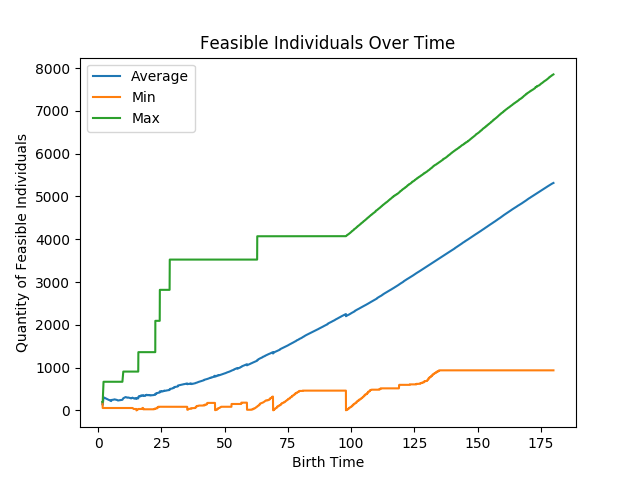

Text(0, 0.5, 'Quantity of Feasible Individuals')

In [42]:
plt.figure()
plt.plot(dic['Average'])
plt.plot(dic['Min'])
plt.plot(dic['Max'])
plt.legend(['Average', 'Min', 'Max'])
plt.title(f'Feasible Individuals Over Time')
plt.xlabel('Birth Time')
plt.ylabel('Quantity of Feasible Individuals')

In [87]:
ax = dic.plot(y='Average', c='C0', use_index=True)
dic['birth_time'] = dic.index
#plt.fill_between(x='birth_time', y1='Min', y2='Max', data=dic)
plt.plot(x='birth_time', y='Max', c='C1', data=dic)

plt.title(f'Feasible Individuals Over Time')
plt.xlabel('Birth Time')
plt.ylabel('Quantity of Feasible Individuals')
plt.legend([])

<IPython.core.display.Javascript object>

TypeError: plot got an unexpected keyword argument 'x'

In [93]:
dfs[6]

,id,generation,parents,fitness,fitness_trace,birth_time,route,label,label_count_cumulative


In [94]:
bf_times = []

for df in dfs:
    try:
        print(df.iloc[0]['birth_time'])
        bf_times.append(df.iloc[0]['birth_time'])
    except Exception as e:
        print('-')

16.203031301498413
44.34990429878235
12.986207008361815
35.714067697525024
15.951307535171509
30.17235565185547
-
53.325371265411384
55.449406147003174
83.11754512786865
-
63.8301944732666
-
46.01928567886353
86.47529792785645
46.24248576164246
26.103406190872192
31.019707202911377
5.438996076583862
153.04430294036862
12.942408084869385
16.593963861465454
61.56331276893616
66.28629755973816
9.700397491455078
30.875214099884033
19.919416904449466
6.494837284088135
25.81982684135437
26.77996349334717
67.32035613059998
60.129939556121826
103.5303897857666
8.103901386260986
3.6457266807556152
12.304989576339722
20.156702995300293
112.19021105766295
41.94463038444518
17.135602712631226
38.58382415771485
80.7465753555298
71.44936299324036
6.2452919483184814
-
3.85488224029541
5.603632688522339
10.690697908401491
8.976603507995605
28.7304162979126


In [95]:
min(bf_times)

3.6457266807556152

In [96]:
max(bf_times)

153.04430294036862

In [97]:
sum(bf_times)/len(bf_times)

38.777440174766205

<IPython.core.display.Javascript object>


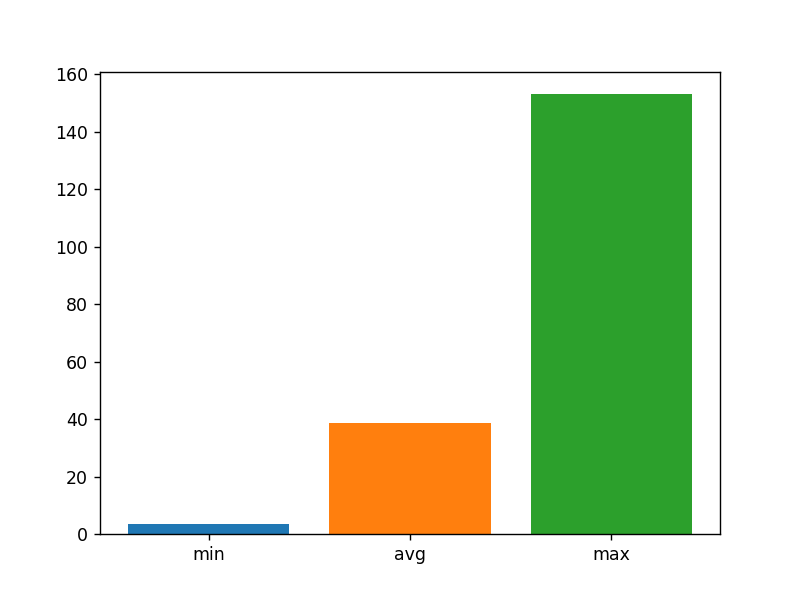

<BarContainer object of 3 artists>

In [98]:
pathlist = PPath(PATH).glob("**/mode_EMA*_exec_1_*.csv")
dfs = []
map_numbers = []
for i, path in enumerate(pathlist):
    print(path)
    m = re.search(r'(_map_\d*_)',str(path))
    if m:
        found = m.group(1)
    number = re.sub(r"[A-Za-z/\-_\.]", "", found) 
    map_numbers.append(number)
    
    df = pd.read_csv(path)
    df = df[df['birth_time']<=180] #trim
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    df_feasible = pd.DataFrame(df[df['label']=='feasible'])
    df_feasible['label_count_cumulative'] = 1
    df_feasible['label_count_cumulative'] = df_feasible['label_count_cumulative'].cumsum()
    
    dfs.append(df_feasible)
    
    #if i == 5:
     #   break

In [131]:
legends = [f'Map {i}' for i in map_numbers]

In [185]:
dic={}
for df, legend in zip(dfs, legends):
    grouped = df.groupby(df['birth_time'].apply(lambda x: round(x, 2))).count()
    dic[f"{legend}"] = grouped['label_count_cumulative'].cumsum()

    
    
dic = pd.DataFrame(dic)
dic = dic.fillna(method='ffill')



dic['Average'] = dic.mean(axis=1)
dic['Min'] = dic.min(axis=1)
dic['Max'] = dic.max(axis=1)

In [135]:
# plt.figure()
# plt.plot(dic)

<IPython.core.display.Javascript object>


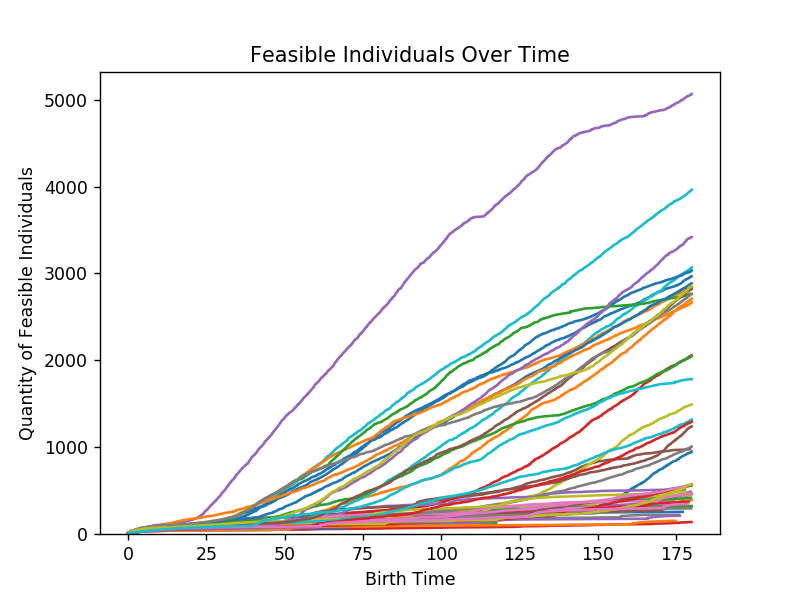

Text(0, 0.5, 'Quantity of Feasible Individuals')

In [137]:
plt.figure()
for df_feasible in dfs:
    plt.plot(df_feasible['birth_time'], df_feasible['label_count_cumulative'])

plt.plot()
plt.title(f'Feasible Individuals Over Time')
plt.xlabel('Birth Time')
plt.ylabel('Quantity of Feasible Individuals')
#plt.legend(legends)

In [ ]:
plt.plot(df['birth_time'], df['label_count_cumulative'])

In [ ]:
df['birth_time']

In [ ]:
df['label_count_cumulative']

# Experiments

In [171]:
pathlist = PPath(PATH).glob("**/mode_EMC*_exec_1_*.csv")
dfs = []
map_numbers = []
for i, path in enumerate(pathlist):
#     print(path)
    m = re.search(r'(_map_\d*_)',str(path))
    if m:
        found = m.group(1)
    number = re.sub(r"[A-Za-z/\-_\.]", "", found) 
    map_numbers.append(number)
    
    df = pd.read_csv(path)
    df = df[df['birth_time']<=180] #trim
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    df_feasible = pd.DataFrame(df[df['label']=='feasible'])
    df_feasible['label_count_cumulative'] = 1
    df_feasible['label_count_cumulative'] = df_feasible['label_count_cumulative'].cumsum()
    
    dfs.append(df_feasible)
    
    
    if i == 2:
        break

legends = [f'Map {i}' for i in map_numbers]

In [172]:
df = dfs[0]

In [173]:
def get_fitness_trace(x, i):
    x = ast.literal_eval(x)
    return x[i]

# fit_d fit_obs fit_con fit_cur fit_t fit_dist fit_z_bonus
df['fit_d'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 0))
df['fit_obs'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 1))
df['fit_con'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 2))
df['fit_cur'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 3))
df['fit_t'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 4))
df['fit_dist'] = df['fitness_trace'].apply(lambda x: get_fitness_trace(x, 5))
df['fit_z_bonus'] = df['fitness_trace'].apply(lambda x: -get_fitness_trace(x, 6))

In [176]:
df.head()

,id,generation,parents,fitness,fitness_trace,birth_time,route,label,label_count_cumulative,fit_d,fit_obs,fit_con,fit_cur,fit_t,fit_dist,fit_z_bonus
1,1,0,[],485451.224303,"[0, 0, 18.946946737206826, 6.882239889576366, ...",0.001596,"[[0, 0], [0.09870471480564968, 0.0], [0.307417...",feasible,1,0,0,18.946947,6.882240,18,18.360205,48.499457
4,4,0,[],406062.298018,"[0, 0, 33.50496803593619, 11.077585727655254, ...",0.001909,"[[0, 0], [-0.04853945484943001, 0.0], [-0.2637...",feasible,2,0,0,33.504968,11.077586,24,33.217812,40.534325
7,7,0,[],283283.090606,"[0, 0, 5.712787180470426, 1.4593576510185913, ...",0.002069,"[[0, 0], [0.7985101036391054, 0.0], [0.1763742...",feasible,3,0,0,5.712787,1.459358,2,1.506386,28.318986
8,8,0,[],314350.192078,"[0, 0, 16.000894895926724, 7.683025347807761, ...",0.002134,"[[0, 0], [-0.7981713578515572, 0.0], [-1.79453...",feasible,4,0,0,16.000895,7.683025,14,9.827913,31.396352
9,9,0,[],424679.880681,"[0, 0, 19.968215877924244, 7.47271932344375, 1...",0.002193,"[[0, 0], [0.8009844949112244, 0.0], [-0.680293...",feasible,5,0,0,19.968216,7.472719,13,21.188768,42.425428


In [160]:
df['fit_d'].mean()

0.0

In [198]:
dic = {}
grouped = df.groupby(df['birth_time'].apply(lambda x: round(x, 0))).mean()

dic['fitness'] = grouped['fitness']
# dic['fit_d'] = grouped['fit_d']
# dic['fit_z_bonus'] = grouped['fit_z_bonus']

dic = pd.DataFrame(dic)
dic = dic.fillna(method='ffill')

In [199]:
dic

,fitness
birth_time,
0.0,6.490193e+05
1.0,3.437176e+05
2.0,3.456434e+05
3.0,3.284444e+05
4.0,2.553643e+05
5.0,1.967178e+05
6.0,3.254076e+05
7.0,2.675818e+05
8.0,3.165945e+05


<IPython.core.display.Javascript object>


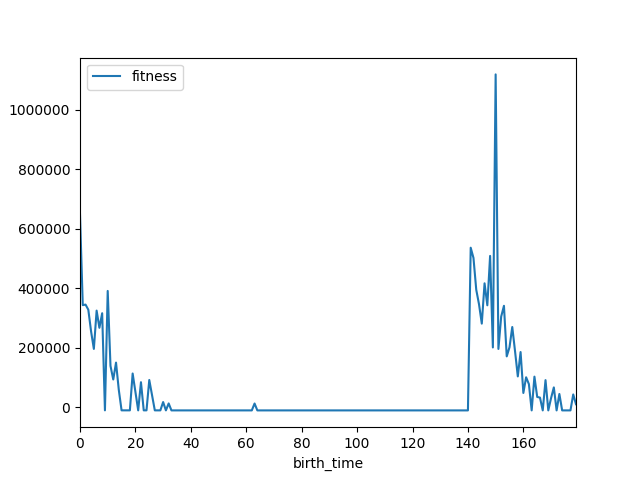

In [200]:
dic.plot()

<IPython.core.display.Javascript object>


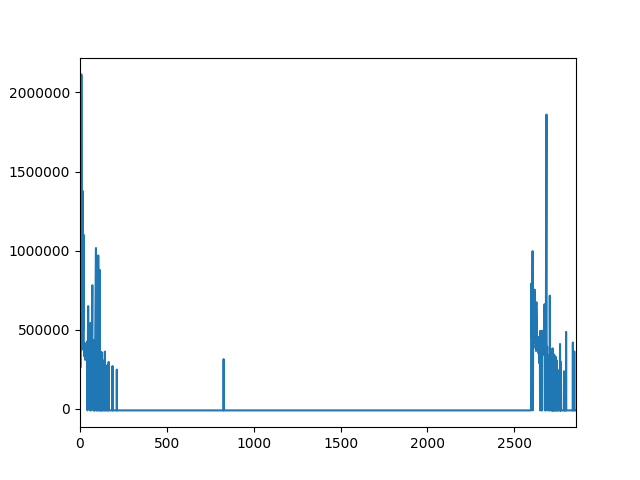

In [201]:
plt.figure()
df['fitness'].plot()

In [164]:
dic={}
for df, legend in zip(dfs, legends):
    grouped = df.groupby(df['birth_time'].apply(lambda x: round(x, 2))).mean()
    print(grouped)
    #dic[f"{legend}"] = grouped['fit_d']
    break

                id  generation        fitness  birth_time  \
birth_time                                                  
0.00         11.25         0.0  377339.795976    0.002296   
0.82         25.00         1.0  292186.292906    0.815218   
0.85         27.00         1.0  276992.781321    0.853741   
0.96         28.00         1.0  384168.005416    0.963556   
1.03         30.00         1.0  205888.740042    1.031195   
...            ...         ...            ...         ...   
170.70      501.00        62.0  113704.303572  170.697791   
171.63      503.00        63.0  134473.033721  171.633187   
172.16      504.00        63.0  260760.058704  172.163876   
173.26      506.00        63.0  212883.559094  173.263519   
174.81      507.00        64.0  138236.553534  174.806747   

            label_count_cumulative  
birth_time                          
0.00                           6.5  
0.82                          13.0  
0.85                          14.0  
0.96                 